# Data Cleaning and EDA for Data Science Jobs
This notebook demonstrates a full pipeline for loading, cleaning, and analyzing a dataset of data science job postings. It includes:
- Data loading
- Data cleaning
- Feature engineering
- Exploratory Data Analysis (EDA) with plots


## 0. Import library

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice style for plots
sns.set(style="whitegrid")


## 1. Data Loading
We first define a function to load the CSV data, and then preview the first few rows.


In [2]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    return df

dsjob = load_data('Uncleaned_DS_jobs.csv')
dsjob.head()


Dataset loaded: 672 rows, 15 columns


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## 2. Data Cleaning
This section includes:
- Remove the number in Company Name Column
- Replacing placeholder values (`-1`) with NaN or "Unknown".
- Cleaning salary columns and extracting numeric salary information.
- Removing extra spaces from text columns.
- Dropping unnecessary columns.


### Remove the number in Company Name Column

In [6]:
# Clean company name column by removing numeric ratings
dsjob['Company Name'] = dsjob['Company Name'].str.split('\n').str[0].str.strip()
dsjob[['Company Name']].head()

,Company Name
0,Healthfirst
1,ManTech
2,Analysis Group
3,INFICON
4,Affinity Solutions


###  Replacing placeholder values (`-1`) with NaN or "Unknown".

In [7]:
def replace_minus_one(df):
    replace_mapping = {
        'Rating': np.nan,
        'Headquarters': 'Unknown',
        'Size': 'Unknown',
        'Founded': np.nan,
        'Type of ownership': 'Unknown',
        'Industry': 'Unknown',
        'Sector': 'Unknown',
        'Revenue': 'Unknown',
        'Competitors': 'Unknown'
    }
    for col, replacement in replace_mapping.items():
        df[col] = df[col].replace(-1, replacement)
    return df

dsjob = replace_minus_one(dsjob)
dsjob.head()


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Cleaning salary columns and extracting numeric salary information


In [12]:
def clean_salary(df):
    # Remove symbols and text
    df['Salary Estimate'] = (
        df['Salary Estimate']
        .str.replace(r'[$K,]', '', regex=True)
        .str.replace(r' \(Glassdoor est.\)|\(Employer est.\)', '', regex=True)
    )
    # Split into min and max
    df[['min_salary', 'max_salary']] = df['Salary Estimate'].str.split('-', expand=True)
    df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
    df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')
    df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2
    df['salary_range'] = df['max_salary'] - df['min_salary']
    return df

dsjob = clean_salary(dsjob)
dsjob[['Salary Estimate', 'min_salary', 'max_salary', 'avg_salary']].head()


,Salary Estimate,min_salary,max_salary,avg_salary
0,137-171,137,171,154.0
1,137-171,137,171,154.0
2,137-171,137,171,154.0
3,137-171,137,171,154.0
4,137-171,137,171,154.0


### Removing extra spaces from text column

In [13]:
def clean_text_spaces(df):
    obj_cols = df.select_dtypes(include=['object']).columns
    for col in obj_cols:
        df[col] = df[col].str.strip()
    return df
dsjob = clean_text_spaces(dsjob)

### Dropping unnecessary columns

In [14]:
def drop_columns(df, cols):
    return df.drop(columns=cols, errors='ignore')
dsjob = drop_columns(dsjob, ['index'])

## 3. Feature Engineering
We add new columns for:
- State extraction from location
- Job skills (Python, Excel, etc.)
- Simplified job title categories
- Seniority level
- Company age
- Description length


### State extraction from location


In [15]:
def extract_state(df):
    df['state'] = df['Location'].str.extract(r',\s*([A-Za-z]{2})')
    return df

dsjob = extract_state(dsjob)
dsjob[['Location', 'state']].head()




,Location,state
0,"New York, NY",NY
1,"Chantilly, VA",VA
2,"Boston, MA",MA
3,"Newton, MA",MA
4,"New York, NY",NY


### Job skills (Python, Excel, etc.)

In [17]:
def extract_skills(df):
    skills = ['python', 'excel', 'tableau', 'big data', 'hadoop', 'spark', 'aws']
    for skill in skills:
        df[skill] = df['Job Description'].str.lower().str.contains(skill).astype(int)
    df['num_skills'] = df[skills].sum(axis=1)
    return df

dsjob = extract_skills(dsjob)
dsjob[['Job Description', 'python', 'excel','big data', 'hadoop', 'spark', 'aws', 'num_skills']].head()


,Job Description,python,excel,big data,hadoop,spark,aws,num_skills
0,Description\n\nThe Senior Data Scientist is re...,0,0,0,0,0,1,1
1,"Secure our Nation, Ignite your Future\n\nJoin ...",0,0,1,1,0,0,2
2,Overview\n\n\nAnalysis Group is one of the lar...,1,1,0,0,0,1,3
3,JOB DESCRIPTION:\n\nDo you have a passion for ...,1,1,0,0,0,1,3
4,Data Scientist\nAffinity Solutions / Marketing...,1,1,0,0,0,0,2


### Job Title and Seniority

In [18]:
def title_simplifier(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'analyst' in title:
        return 'analyst'
    elif 'engineer' in title:
        return 'engineer'
    else:
        return 'other'

def get_seniority(title):
    title = title.lower()
    if 'senior' in title or 'sr' in title:
        return 'senior'
    elif 'lead' in title or 'principal' in title:
        return 'lead'
    elif 'junior' in title or 'jr' in title:
        return 'junior'
    else:
        return 'na'

def extract_job_features(df):
    df['job_simplified'] = df['Job Title'].apply(title_simplifier)
    df['seniority'] = df['Job Title'].apply(get_seniority)
    return df

dsjob = extract_job_features(dsjob)
dsjob[['Job Title', 'job_simplified', 'seniority']].head()


,Job Title,job_simplified,seniority
0,Sr Data Scientist,data scientist,senior
1,Data Scientist,data scientist,na
2,Data Scientist,data scientist,na
3,Data Scientist,data scientist,na
4,Data Scientist,data scientist,na


### Add Company Age & Desc Length

In [19]:
def add_company_age(df):
    df['company_age'] = 2025 - df['Founded']
    return df

def add_desc_length(df):
    df['desc_length'] = df['Job Description'].apply(len)
    return df

dsjob = add_company_age(dsjob)
dsjob = add_desc_length(dsjob)
dsjob[['Founded', 'company_age', 'desc_length']].head()


,Founded,company_age,desc_length
0,1993.0,32.0,3389
1,1968.0,57.0,4076
2,1981.0,44.0,8749
3,2000.0,25.0,3349
4,1998.0,27.0,2728


### Data Overview

In [20]:
print(dsjob.info())
print(dsjob['job_simplified'].value_counts())
dsjob.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             622 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            554 non-null    float64
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
 14  min_salary         672 non-null    int64  
 15  max_salary         672 non-null    int64  
 16  avg_salary         672 non

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tableau,big data,hadoop,spark,aws,num_skills,job_simplified,seniority,company_age,desc_length
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,...,0,0,0,0,1,1,data scientist,senior,32.0,3389
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,...,0,1,1,0,0,2,data scientist,na,57.0,4076
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,...,0,0,0,0,1,3,data scientist,na,44.0,8749
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,...,0,0,0,0,1,3,data scientist,na,25.0,3349
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,0,0,0,0,0,2,data scientist,na,27.0,2728


## 4. Exploratory Data Analysis (EDA)
We visualize:
- Missing values
- Salary and rating distributions
- Relationships between features
- Job role counts and top states
- Correlation heatmap


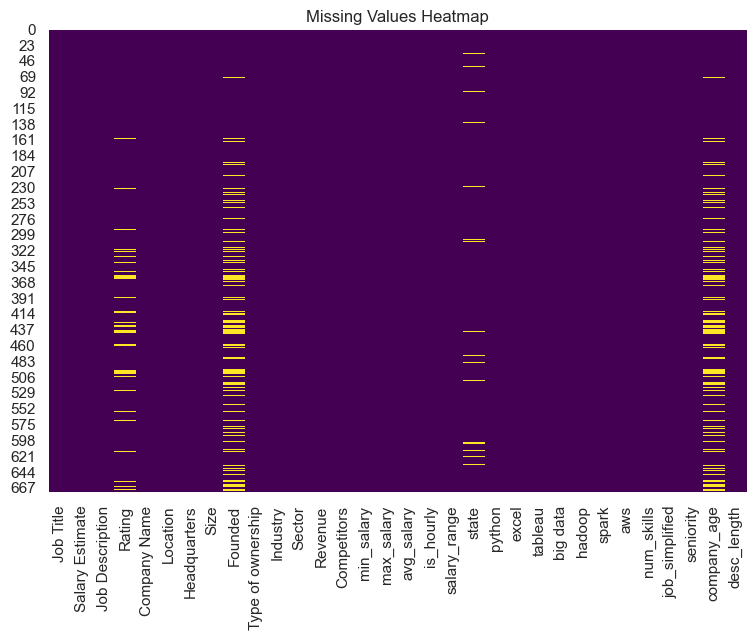

In [29]:
plt.figure(figsize=(9, 6))
sns.heatmap(dsjob.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()

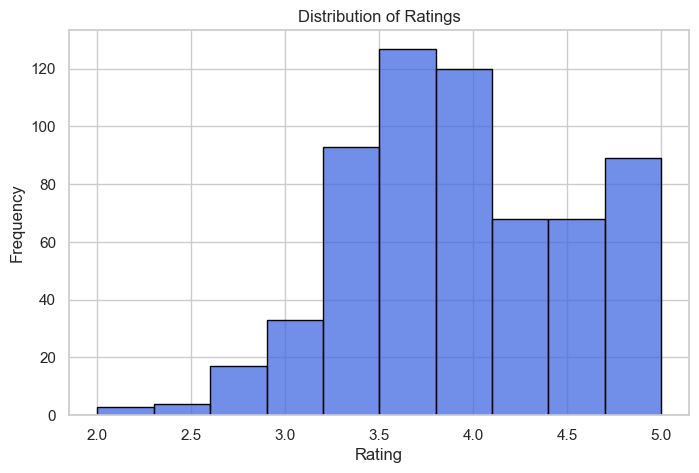

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(dsjob['Rating'], bins=10, kde=False, color='royalblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

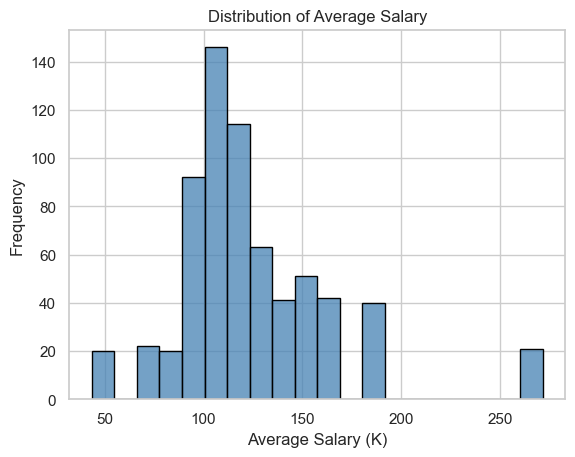

In [33]:
sns.histplot(dsjob['avg_salary'], bins=20, color='steelblue', edgecolor='black')
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary (K)')
plt.ylabel('Frequency')
plt.show()

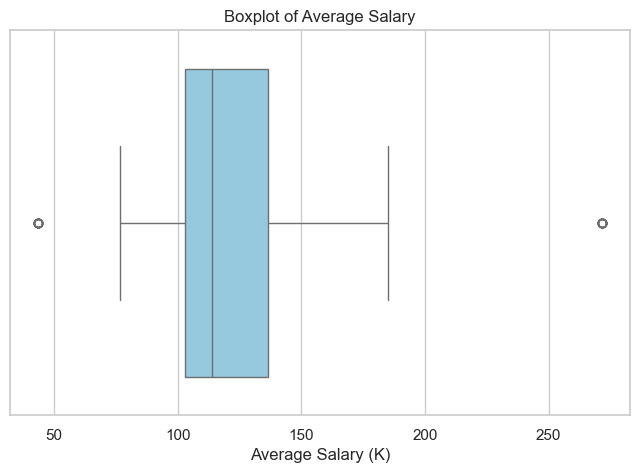

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dsjob['avg_salary'], color='skyblue')
plt.title('Boxplot of Average Salary')
plt.xlabel('Average Salary (K)')
plt.show()

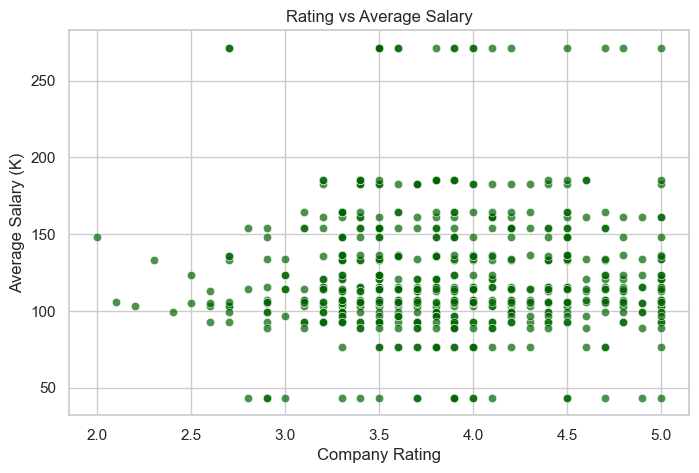

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dsjob, x='Rating', y='avg_salary', color='darkgreen', alpha=0.7)
plt.title('Rating vs Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (K)')
plt.show()

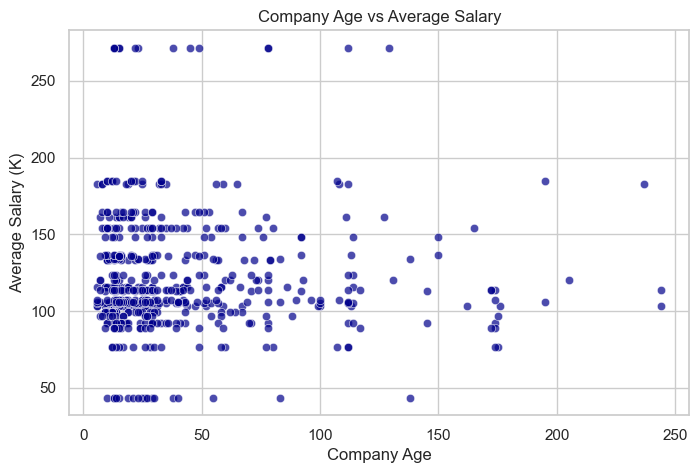

In [36]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=dsjob, x='company_age', y='avg_salary', color='darkblue', alpha=0.7)
    plt.title('Company Age vs Average Salary')
    plt.xlabel('Company Age')
    plt.ylabel('Average Salary (K)')
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4388\1982605623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dsjob, x='job_simplified', palette='pastel')


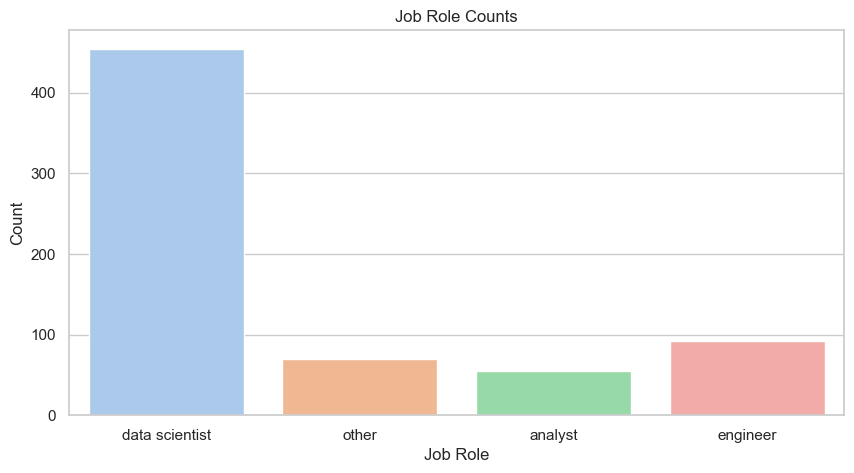

In [37]:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=dsjob, x='job_simplified', palette='pastel')
    plt.title('Job Role Counts')
    plt.xlabel('Job Role')
    plt.ylabel('Count')
    plt.show()

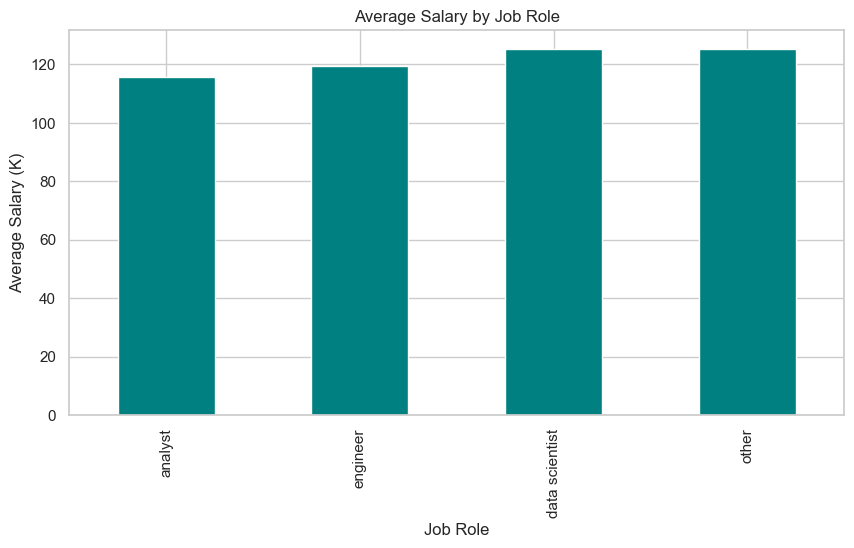

In [38]:
    plt.figure(figsize=(10, 5))
    avg_salary_by_role = dsjob.groupby('job_simplified')['avg_salary'].mean().sort_values()
    avg_salary_by_role.plot(kind='bar', color='teal')
    plt.title('Average Salary by Job Role')
    plt.xlabel('Job Role')
    plt.ylabel('Average Salary (K)')
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4388\180695447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='cool')


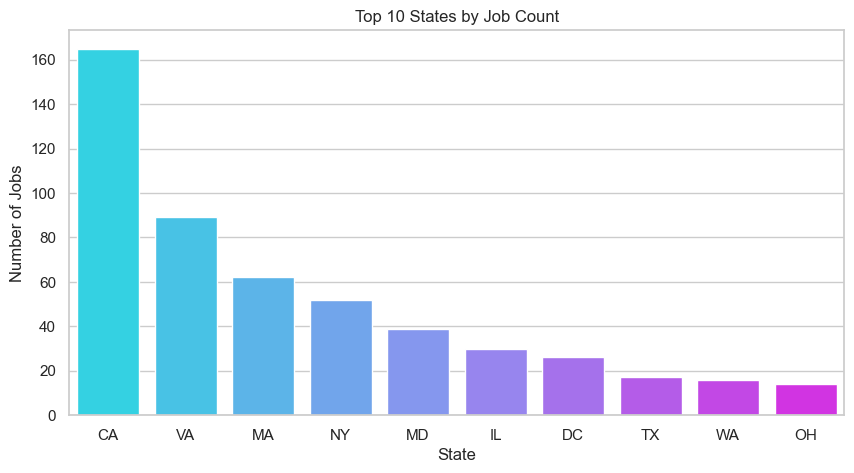

In [39]:
    plt.figure(figsize=(10, 5))
    top_states = dsjob['state'].value_counts().head(10)
    sns.barplot(x=top_states.index, y=top_states.values, palette='cool')
    plt.title('Top 10 States by Job Count')
    plt.xlabel('State')
    plt.ylabel('Number of Jobs')
    plt.show()

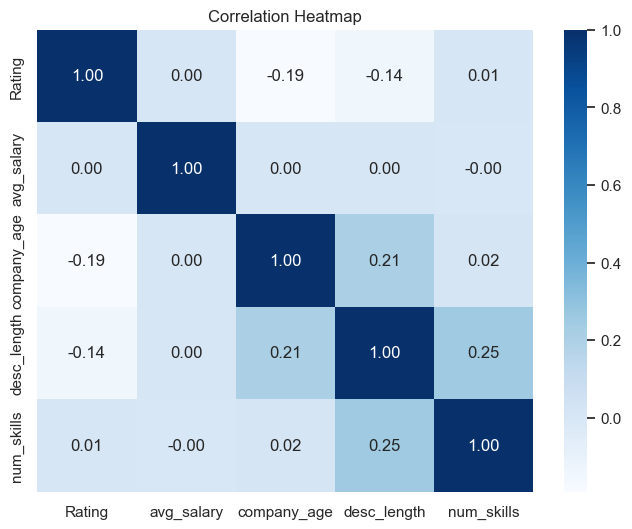

In [40]:
    numeric_cols = ['Rating', 'avg_salary', 'company_age', 'desc_length', 'num_skills']
    corr = dsjob[numeric_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()